In [95]:
"""
File: KingFit.ipynb

This script performs a king fit on a globular cluster

Author: Will St. John
Spring 2024
"""
import numpy as np
from astropy.io import fits
from astropy import units as u
from astropy import constants as const
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from astropy.visualization.wcsaxes import WCSAxes
from astropy.nddata import Cutout2D
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18
from matplotlib.patches import Ellipse
from photutils.aperture import SkyEllipticalAperture
from photutils.aperture import SkyCircularAperture
from photutils.aperture import aperture_photometry
from photutils.aperture import EllipticalAnnulus
from photutils.aperture import EllipticalAperture
from photutils.aperture import SkyEllipticalAnnulus
from photutils import isophote
from photutils.isophote import EllipseGeometry, Ellipse
from photutils.aperture import CircularAperture, CircularAnnulus
from photutils.aperture import EllipticalMaskMixin
from photutils.isophote import build_ellipse_model
from photutils.detection import DAOStarFinder
from photutils.segmentation import detect_sources
from astropy.stats import mad_std
from photutils.utils import calc_total_error
from matplotlib import rcParams
%matplotlib inline
rcParams['figure.figsize'] = [10., 8.]
import matplotlib.cm as cm
import pyregion
font = {'family': 'serif',
        'color':  'white',
        'weight': 'normal',
        'size': 22,
        }
import os
# ignore warnings
import warnings
warnings.filterwarnings('ignore')
import glob
from astropy.stats import sigma_clipped_stats
import matplotlib.pyplot as plt
from astropy.convolution import convolve
from astropy.stats import sigma_clipped_stats
from astropy.visualization import simple_norm
from photutils.datasets import make_100gaussians_image
from photutils.segmentation import detect_sources, make_2dgaussian_kernel
from scipy.optimize import curve_fit

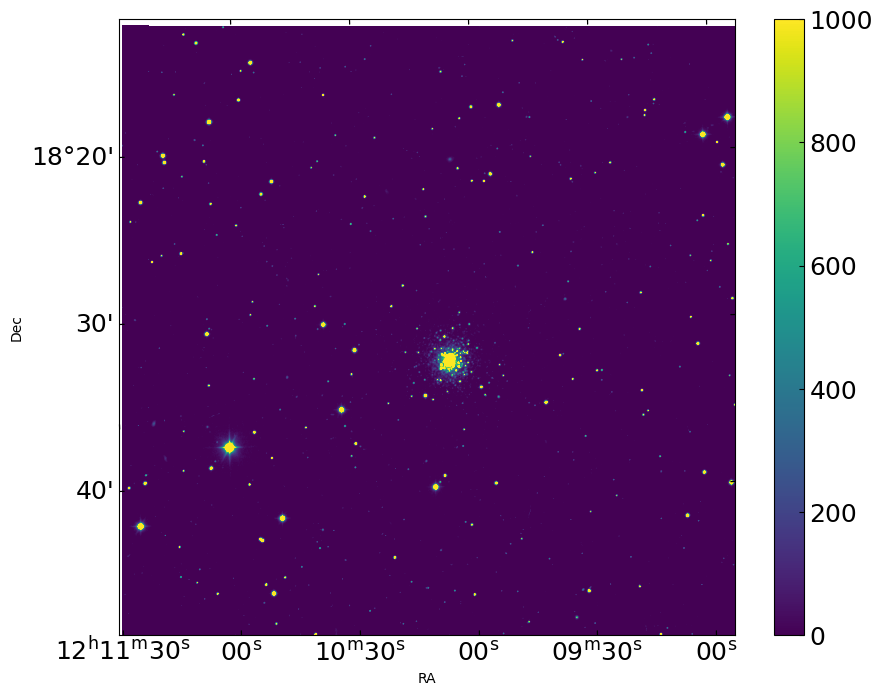

In [18]:
targetPath = '/Users/research/Desktop/KingClusters/Clusters/NGC4147/stacked/NGC4147_stacked.fts'
data, header = fits.getdata(targetPath, header=True)  # need to get header info
wcs = WCS(header)
plt.subplot(1,1,1, projection=wcs)
mean, median, std = np.nanmean(data), np.nanmean(data), np.nanstd(data)
data -= mean
vmin = median - 4*std
vmax = median + 1*std
plt.imshow(data, vmin=0, vmax=1000)
plt.xlabel("RA")
plt.ylabel("Dec")
# plt.title(f"target:{header['OBJECT']}     filter:{header['FILTER']}     exposure:{header['EXPOSURE']}")
# subdata = data[2000-100:2000+100,2000-100:2000+100]
plt.colorbar()
plt.show()

threshold = 3. * std
kernel = make_2dgaussian_kernel(3.0, size=3)  # FWHM = 3.
convolved_data = convolve(data, kernel)
segm = detect_sources(convolved_data, threshold, npixels=5)

# geff=float(header['EGAIN']) # This is the effective gain (assumed to be the same as the EGAIN for
# daofind = DAOStarFinder(fwhm=3., threshold=2. * std, exclude_border=True)
# sources = daofind(data)  
# for col in sources.colnames:  
#     sources[col].info.format = '%.8g'  # for consistent table output

# sources
# geff
# positions = np.transpose((sources['xcentroid'], sources['ycentroid']))

# r = 8  # set with AstroImageJ
# r_in = 14  # set with AstroImageJ
# r_out = 20  # set with AstroImageJ

# apertures = CircularAperture(positions, r=r)
# sky_annulus = CircularAnnulus(positions, r_in=r_in, r_out=r_out)

# skyapertures = apertures.to_sky(wcs)
# skyannulus = sky_annulus.to_sky(wcs)

# pixelapertures = skyapertures.to_pixel(wcs)
# pixelannulus = skyannulus.to_pixel(wcs)
# # plt.figure(figsize=(18,18), dpi=2000)
# # plt.subplot(1,1,1, projection=wcs)
# plt.imshow(subdata[2000-100:2000+100,2000-100:2000+100], vmax=vmax, vmin=vmin)
# skyapertures.to_pixel(wcs).plot()
# skyannulus.to_pixel(wcs).plot(color='orange')
# plt.show()
# error = calc_total_error(subdata.astype(float), bkg_error, geff)
# phot_table = aperture_photometry(subdata, apertures, method='exact', error=error)
# sky_table = aperture_photometry(subdata, sky_annulus, method='exact', error=error)
# bkgmean = (sky_table['aperture_sum'][0])/(pixelannulus.area)
# phot_table['aperture_flux'] = phot_table['aperture_sum'] - (bkgmean * pixelapertures.area)
# phot_table['aperture_mag'] = -2.5 * np.log10(phot_table['aperture_flux'])
# phot_table
# plt.hist(phot_table['aperture_mag'].flatten(), bins=30)
# plt.plot()
# def runPhotometry(targetPath):
#     # First chunk
#     # targetPath = '/Users/research/Desktop/PHYS_440_StJohn/PhotometryProject/images/RLMT/036/mws_King17_32_I.fts'
#     data, header = fits.getdata(targetPath, header=True)
#     wcs = WCS(header)
#     plt.subplot(1,1,1, projection=wcs)
#     vmin = np.mean(data) - np.std(data)
#     vmax = np.mean(data) + np.std(data)
#     plt.imshow(data, vmin=vmin, vmax=vmax)
#     plt.xlabel("RA")
#     plt.ylabel("Dec")
#     plt.title(f"target:{header['OBJECT']}     filter:{header['FILTER']}     exposure:{header['EXPOSURE']}")
#     plt.show()

#     # second chunk
#     subdata = data[2000-100:2000+100,2000-100:2000+100]
#     plt.subplot(1,1,1, projection=wcs)
#     plt.imshow(subdata, vmax=vmax, vmin=vmin, origin='lower')
#     plt.show()

#     bkg_error = np.mean(subdata)
#     bkg_sigma = mad_std(subdata)
#     geff=float(header['EGAIN']) # This is the effective gain (assumed to be the same as the EGAIN for
#     daofind = DAOStarFinder(fwhm=4., threshold=5. * bkg_sigma, exclude_border=True)
#     sources = daofind(subdata)  
#     for col in sources.colnames:  
#         sources[col].info.format = '%.8g'  # for consistent table output
        
#     # sources
#     # geff

#     # third chunk
#     positions = np.transpose((sources['xcentroid'], sources['ycentroid']))

#     r = 8  # set with AstroImageJ
#     r_in = 14  # set with AstroImageJ
#     r_out = 20  # set with AstroImageJ

#     apertures = CircularAperture(positions, r=r)
#     sky_annulus = CircularAnnulus(positions, r_in=r_in, r_out=r_out)

#     skyapertures = apertures.to_sky(wcs)
#     skyannulus = sky_annulus.to_sky(wcs)

#     pixelapertures = skyapertures.to_pixel(wcs)
#     pixelannulus = skyannulus.to_pixel(wcs)

#     # fourth chunk
#     plt.subplot(1,1,1, projection=wcs)
#     plt.imshow(subdata, vmax=vmax, vmin=vmin, origin='lower')
#     skyapertures.to_pixel(wcs).plot()
#     skyannulus.to_pixel(wcs).plot(color='orange')
#     plt.show()

#     # fifth chunk
#     error = calc_total_error(subdata.astype(float), bkg_error, geff)
#     phot_table = aperture_photometry(subdata, apertures, method='exact', error=error)
#     sky_table = aperture_photometry(subdata, sky_annulus, method='exact', error=error)
#     bkgmean = (sky_table['aperture_sum'][0])/(pixelannulus.area)
    
#     # sixth chunk
#     phot_table['aperture_flux'] = phot_table['aperture_sum'] - (bkgmean * pixelapertures.area)
#     phot_table['aperture_mag'] = -2.5 * np.log10(phot_table['aperture_flux'])

#     # seventh chunk
#     plt.hist(phot_table['aperture_mag'].flatten(), bins=30)
#     plt.show()
#     return phot_table
# images = glob.glob('/Users/research/Desktop/PHYS_440_StJohn/PhotometryProject/images/RLMT/036/*King17*')
# g_table = runPhotometry(images[0])
# r_table = runPhotometry(images[1])
# i_table = runPhotometry(images[2])
# i_table
# plt.scatter(g_table['aperture_mag'], i_table['aperture_mag'])
# plt.ylim(-12.0, -12.7)
# plt.xlabel('g mag')
# plt.ylabel('i mag')
# plt.title('i vs g mag')
# plt.scatter(g_table['aperture_mag'], r_table['aperture_mag'])
# plt.xlabel('g mag')
# plt.ylabel('r mag')
# plt.title('r vs g mag')


2198.5 1831.0


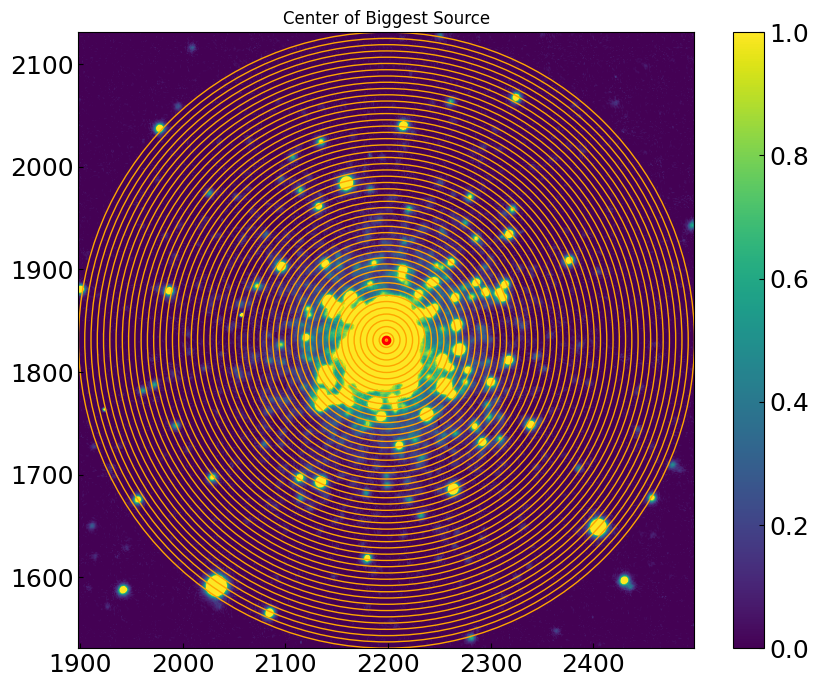

In [113]:
# finding the center of the largest detected source
max_areas = segm.areas == max(segm.areas)
max_lab = segm.labels[max_areas]
max_area_center = segm.segments[max_lab[0]-1].bbox.center  # numpy order = y, x
# segm.imshow()
segm.imshow()
dx, dy = data.shape
plt.imshow(data, vmin=0, vmax=1000)
y, x = max_area_center
plt.scatter(x, y, c='red')
print(x, y)
plt.title('Center of Biggest Source')
plt.colorbar()
plt.xlim(x - 300, x + 300)
plt.ylim(y - 300, y + 300)
aperatures = []
radii = np.linspace(1,300, 50)
for i in radii:
    ap = CircularAperture((x, y), r=i)
    aperatures.append(ap)

for i in aperatures:
    i.plot(color='orange')

plt.show()

In [114]:
photTable = aperture_photometry(data, aperatures)
photTable

id,xcenter,ycenter,aperture_sum_0,aperture_sum_1,aperture_sum_2,aperture_sum_3,aperture_sum_4,aperture_sum_5,aperture_sum_6,aperture_sum_7,aperture_sum_8,aperture_sum_9,aperture_sum_10,aperture_sum_11,aperture_sum_12,aperture_sum_13,aperture_sum_14,aperture_sum_15,aperture_sum_16,aperture_sum_17,aperture_sum_18,aperture_sum_19,aperture_sum_20,aperture_sum_21,aperture_sum_22,aperture_sum_23,aperture_sum_24,aperture_sum_25,aperture_sum_26,aperture_sum_27,aperture_sum_28,aperture_sum_29,aperture_sum_30,aperture_sum_31,aperture_sum_32,aperture_sum_33,aperture_sum_34,aperture_sum_35,aperture_sum_36,aperture_sum_37,aperture_sum_38,aperture_sum_39,aperture_sum_40,aperture_sum_41,aperture_sum_42,aperture_sum_43,aperture_sum_44,aperture_sum_45,aperture_sum_46,aperture_sum_47,aperture_sum_48,aperture_sum_49
,pix,pix,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,2198.5,1831.0,38525.21893247591,1740075.8927533785,5546937.812428905,9479221.28024413,13007684.375995759,16614445.233458575,21064325.746691663,23857610.879489884,25777174.918742158,27583608.9550237,29330743.30516413,31263100.0132318,33622354.60972813,35232477.31494093,36692470.62423074,37680754.72529841,38446682.466767505,39144372.44100692,39774937.006260835,40330475.866212055,41037120.96781215,41631724.55509432,42088042.14144961,42512577.60275241,42904333.36637436,43413710.82637246,44342919.559165314,44904394.68663924,45128158.66268392,45308226.65575517,45410599.34280953,45496908.05166621,45637861.92974447,45748228.37663032,45878731.75218889,46087187.08856328,46268330.94082176,46338749.82946929,46360263.36120147,46333063.18034211,46303129.93767056,46242827.24611652,46176677.30945835,46140412.28753309,46194821.049721,46717995.83857732,47081097.94452384,47596494.222106114,49670408.67310628,50196133.49368061


In [115]:
length = len(photTable.columns[3:])
ap_sums = np.zeros(0)
for i in range(length):
    ap_sums = np.append(ap_sums, [photTable[f'aperture_sum_{i}']])

Text(0.5, 1.0, 'Suface Brightness vs Radius')

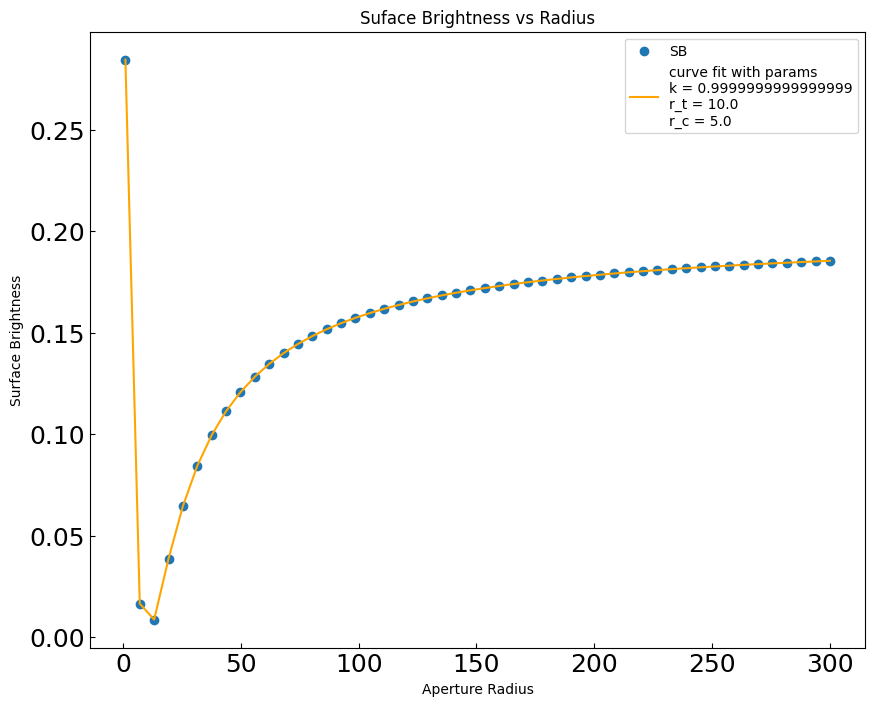

In [136]:

def king_fit(r, k, r_t, r_c):
    return k * ((1/(1 + (r/r_c)**2)**0.5) - (1/(1+(r_t/r_c)**2)**0.5))**2

k = 1
r_t = 10
r_c = 5

ydata = king_fit(radii, k, r_t, r_c)
param, param_cov = curve_fit(king_fit, radii, ydata)
ans = param[0] * ((1/(1 + (radii/param[2])**2)**0.5) - (1/(1+(param[1]/param[2])**2)**0.5))**2
plt.scatter(radii, ydata, label='SB')
plt.plot(radii, ans, color='orange',label=f'curve fit with params\nk = {param[0]}\nr_t = {param[1]}\nr_c = {param[2]}')
plt.legend()
plt.xlabel('Aperture Radius')
plt.ylabel('Surface Brightness')
plt.title('Suface Brightness vs Radius')